# Задача про красно-синие шары
В коробке находятся 15 шаров, из них 7 красных и 8 синих. Вынимают 7 шариков.
Найти вероятность, что будут вынутыми окажутся 4 красных и 3 синих.

Используя классическое определение получаем:
$$ \frac{C_8^{3} \times C_7^{4}}{C_15^{7}} = 0,3045 $$

Оценим вероятность вынуть 7 шариков, при проведении различного количества испытаний.

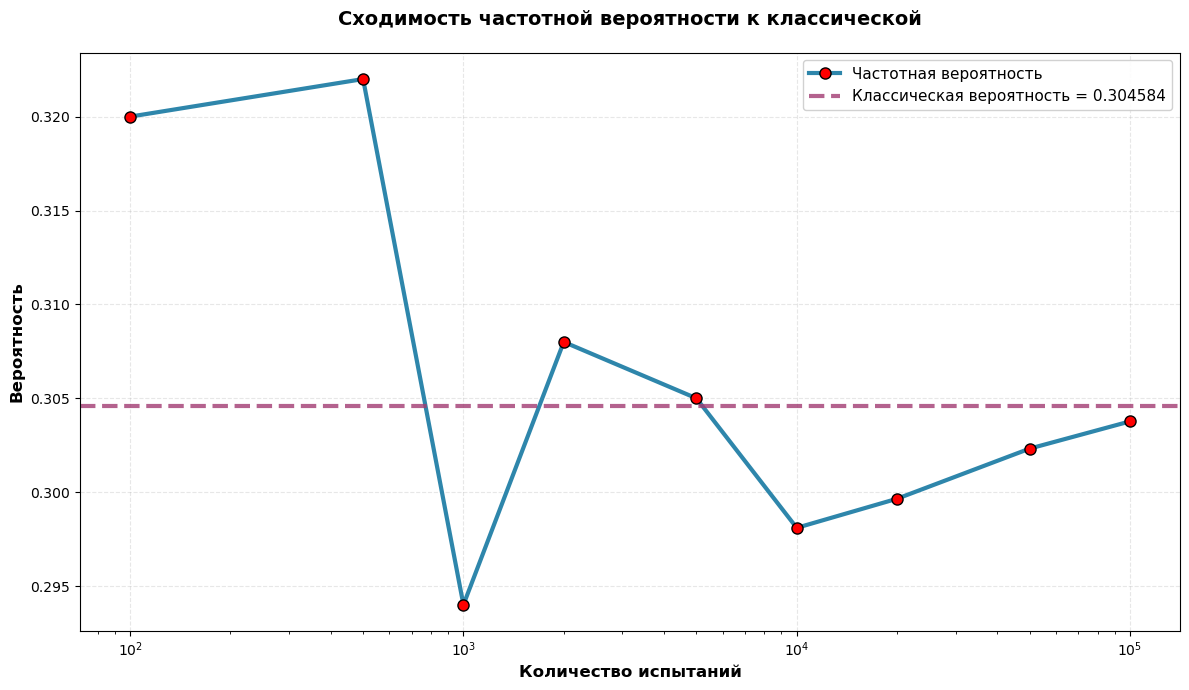


Финальное отклонение после 100000 испытаний: 0.000814


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb


# Классическая вероятность
classical_prob = (comb(8, 3) * comb(7, 4)) / comb(15, 7)

# Эксперимент
np.random.seed()
trials_list = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
frequencies = []

balls = np.array([0] * 7 + [1] * 8)

for n in trials_list:
    success = 0
    for _ in range(n):
        sample = np.random.choice(balls, size=7, replace=False)
        if np.sum(sample == 0) == 4:
            success += 1
    freq = success / n
    frequencies.append(freq)

plt.figure(figsize=(12, 7))
plt.plot(trials_list, frequencies, 'o-', color='#2E86AB', linewidth=3, 
         markersize=8, markerfacecolor='red', markeredgecolor='black', 
         markeredgewidth=1, label='Частотная вероятность')

plt.axhline(y=classical_prob, color='#A23B72', linestyle='--', linewidth=3, 
            alpha=0.8, label=f'Классическая вероятность = {classical_prob:.6f}')


plt.xscale('log')
plt.xlabel('Количество испытаний', fontsize=12, fontweight='bold')
plt.ylabel('Вероятность', fontsize=12, fontweight='bold')
plt.title('Сходимость частотной вероятности к классической', 
          fontsize=14, fontweight='bold', pad=20)

plt.legend(fontsize=11, framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')


plt.tight_layout()
plt.show()

# Вывод итогового отклонения
final_deviation = abs(frequencies[-1] - classical_prob)
print(f"\nФинальное отклонение после {trials_list[-1]} испытаний: {final_deviation:.6f}")